In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
from IPython.core.display import display

In [8]:
df_stacked = pd.DataFrame()

In [4]:
nn_3_layer_v1_stacked = pd.read_csv('./3_layer_v1/result/stacked_preds.csv')
print(nn_3_layer_v1_stacked.shape)
display(nn_3_layer_v1_stacked.head())

nn_4_layer_v1_stacked = pd.read_csv('./4_layer_v1/result/stacked_preds.csv')
print(nn_4_layer_v1_stacked.shape)
display(nn_4_layer_v1_stacked.head())

xgb_v2_stacked = pd.read_csv('xgb_v2/result/stacked_preds.csv')
print(xgb_v2_stacked.shape)
display(xgb_v2_stacked.head())

xgb_v3_stacked = pd.read_csv('xgb_v3/result/stacked_preds.csv')
print(xgb_v3_stacked.shape)
display(xgb_v3_stacked.head())

(188318, 2)


,id,3_layer_v1
0,1,1880.244751
1,2,1478.206909
2,5,4049.240479
3,10,961.461609
4,11,3311.209717


(188318, 2)


,id,4_layer_1
0,1,1777.215576
1,2,1415.820068
2,5,3789.947998
3,10,973.076660
4,11,3240.973145


(188318, 1)


,xgb_param#1_best_num_round
0,2020.957520
1,1762.734131
2,4593.607422
3,1008.679077
4,3080.286133


(188318, 1)


,xgb_param1_different_seed
0,2008.438232
1,1785.353149
2,4533.298340
3,991.094849
4,3136.989746


In [6]:
train = pd.read_csv('./data/train.csv')
display(train.head()['loss'])
y = train['loss']
print(y.shape)

0    2213.18
1    1283.60
2    3005.09
3     939.85
4    2763.85
Name: loss, dtype: float64

(188318,)


In [9]:
df_stacked['3_layer_v1'] = nn_3_layer_v1_stacked['3_layer_v1']
df_stacked['4_layer_v1'] = nn_4_layer_v1_stacked['4_layer_1']
df_stacked['xgb_v2'] = xgb_v2_stacked['xgb_param#1_best_num_round']
df_stacked['xgb_v3'] = xgb_v3_stacked['xgb_param1_different_seed']
df_stacked.head()

,3_layer_v1,4_layer_v1,xgb_v2,xgb_v3
0,1880.244751,1777.215576,2020.957520,2008.438232
1,1478.206909,1415.820068,1762.734131,1785.353149
2,4049.240479,3789.947998,4593.607422,4533.298340
3,961.461609,973.076660,1008.679077,991.094849
4,3311.209717,3240.973145,3080.286133,3136.989746


In [34]:
# single model cross validation mean
print(pd.read_csv('2_layer_v1/result/cross_validation.csv')['val_loss'].mean())
print(pd.read_csv('3_layer_v1/result/cross_validation.csv')['val_loss'].mean())
print(pd.read_csv('4_layer_v1/result/cross_validation.csv')['val_loss'].mean())
print(pd.read_csv('xgb_v1/result/cross_validation.csv')['val_mae'].mean())

1184.39245001
1163.72386453
1161.82930844
1133.39514649


## Linear Regression

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

from sklearn.linear_model import LinearRegression
linear = LinearRegression()

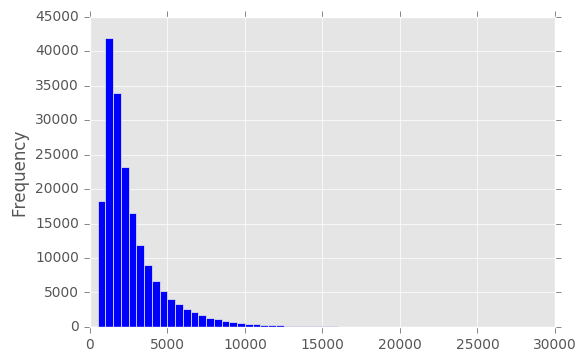

In [19]:
bins = np.arange(0, 30000, 500)
df_stacked['3_layer_v1'].plot(kind='hist', bins=bins, color='blue')
plt.show()

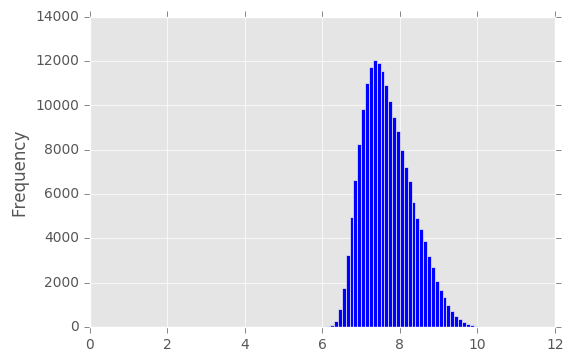

In [26]:
shift = 0
bins = np.arange(0, 10.5, 0.1)
np.log(df_stacked['3_layer_v1'] + shift).plot(kind='hist', bins=bins, color='blue')
plt.show()

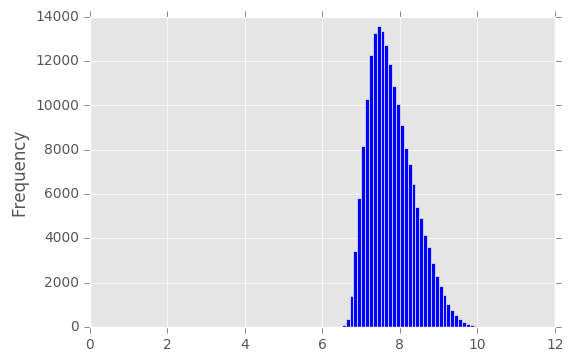

In [27]:
shift = 200
bins = np.arange(0, 10.5, 0.1)
np.log(df_stacked['3_layer_v1'] + shift).plot(kind='hist', bins=bins, color='blue')
plt.show()

In [31]:
# L2 model: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# transformation for linear regression
shift = 200
X = df_stacked.values
X_normed = np.log(X + shift)
y_normed = np.log(y + shift)

X_train, X_test, y_train, y_test = train_test_split(X_normed, y_normed, test_size=0.25, random_state=0)

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print('MAE = ', mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
print('Coef: ', linear.coef_)
print('Intercept = ', linear.intercept_)

MAE =  1132.62208012
Coef:  [ 0.07429303  0.04944903  0.67794486  0.19358247]
Intercept =  0.0381088551625


In [37]:
# 5-Fold cross validation, v1
# L2 model: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# transformation for linear regression
shift = 200
X = df_stacked.values
X_normed = np.log(X + shift)
y_normed = np.log(y + shift)

df_cross_validation = pd.DataFrame()

kf = KFold(n_splits=5, shuffle=True, random_state=0)

for i, (train_index, test_index) in enumerate(kf.split(X_normed), start=1):
    X_train, X_val = X_normed[train_index], X_normed[test_index]
    y_train, y_val = y_normed[train_index], y_normed[test_index]
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    y_pred = linear.predict(X_val)
    df_cross_validation.loc[i, 'val_mae'] = mean_absolute_error(np.exp(y_val), np.exp(y_pred))

display(df_cross_validation)
print('mean MAE on CV = ', df_cross_validation['val_mae'].mean())

,val_mae
1,1135.952620
2,1126.509926
3,1141.416802
4,1122.519709
5,1125.679121


mean MAE on CV =  1130.41563541


In [38]:
# 5-Fold cross validation, v2, not shuffled folds
# L2 model: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# transformation for linear regression
shift = 200
X = df_stacked.values
X_normed = np.log(X + shift)
y_normed = np.log(y + shift)

df_cross_validation = pd.DataFrame()

kf = KFold(n_splits=5)

for i, (train_index, test_index) in enumerate(kf.split(X_normed), start=1):
    X_train, X_val = X_normed[train_index], X_normed[test_index]
    y_train, y_val = y_normed[train_index], y_normed[test_index]
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    y_pred = linear.predict(X_val)
    df_cross_validation.loc[i, 'val_mae'] = mean_absolute_error(np.exp(y_val), np.exp(y_pred))

display(df_cross_validation)
print('mean MAE on CV = ', df_cross_validation['val_mae'].mean())

,val_mae
1,1130.114316
2,1126.267859
3,1138.522201
4,1133.955450
5,1123.734173


mean MAE on CV =  1130.51879984


In [35]:
# L2 model: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# transformation for linear regression
shift = 0
X = df_stacked.values
X_normed = np.log(X + shift)
y_normed = np.log(y + shift)

X_train, X_test, y_train, y_test = train_test_split(X_normed, y_normed, test_size=0.25, random_state=0)

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print('MAE = ', mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
print('Coef: ', linear.coef_)
print('Intercept = ', linear.intercept_)

MAE =  1133.24891963
Coef:  [ 0.07130792  0.04588969  0.68631295  0.2019861 ]
Intercept =  -0.0553117346967


## Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [32]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [33]:
y_pred = rfr.predict(X_test)

In [34]:
mean_absolute_error(y_test, y_pred)

1264.3266148470689

In [21]:
X = df_stacked.values

In [ ]:
for train_index, test_index in kf.split(X):
    